In [1]:
import matplotlib.pyplot as plt
from ebs_simulator import gp3, gp2


In [2]:
gp3_max_performance_volumes = []
gp2_volumes = []
gp3_volumes = []

for size in range(gp2.min_size, gp2.max_size+1):
    gp3_max_performance_volumes.append(gp3(size, 16000, 1000))
    gp2_volume = gp2(size)
    gp2_volumes.append(gp2_volume)
    gp3_volumes.append(gp3(volume_size=gp2_volume.volume_size, IOPS=gp2_volume.IOPS, throughput=gp2_volume.throughput))


In [3]:

def show(gp2_volumes, gp3_volumes, gp3_max_performance_volumes):
    plt.plot([volume.volume_size for volume in gp2_volumes], [volume.IOPS for volume in gp2_volumes], label='gp2')
    plt.plot([volume.volume_size for volume in gp3_volumes], [volume.IOPS for volume in gp3_volumes], label='gp3')
    plt.plot([volume.volume_size for volume in gp3_max_performance_volumes], [volume.IOPS for volume in gp3_max_performance_volumes], label='gp3_max')
    plt.xlabel('volume size(GiB)') 
    plt.ylabel('IOPS') 
    plt.title('gp2/gp3 IOPS by volume size')
    plt.legend() 
    plt.show()

    plt.plot([volume.volume_size for volume in gp2_volumes], [volume.throughput for volume in gp2_volumes], label='gp2')
    plt.plot([volume.volume_size for volume in gp3_volumes], [volume.throughput for volume in gp3_volumes], label='gp3') 
    plt.plot([volume.volume_size for volume in gp3_max_performance_volumes], [volume.throughput for volume in gp3_max_performance_volumes], label='gp3_max')
    plt.xlabel('volume size(GiB)') 
    plt.ylabel('throughput(MB/s)') 
    plt.title('gp2/gp3 throughput(MB) by volume size')
    plt.legend() 
    plt.show()


    plt.plot([volume.volume_size for volume in gp2_volumes], [volume.cost_per_month for volume in gp2_volumes], label='gp2')
    plt.plot([volume.volume_size for volume in gp3_volumes], [volume.cost_per_month for volume in gp3_volumes], label='gp3')
    plt.plot([volume.volume_size for volume in gp3_max_performance_volumes], [volume.cost_per_month for volume in gp3_max_performance_volumes], label='gp3_max')
    plt.xlabel('volume size(GiB)') 
    plt.ylabel('cost per month($)') 
    plt.title('gp2/gp3 cost by volume size')
    plt.legend() 
    plt.show()


In [4]:
print(f'gp3 type {gp3_max_performance_volumes[31].volume_size} GB volume size부터 최대 {gp3_max_performance_volumes[31].IOPS} IOPS, {gp3_max_performance_volumes[31].throughput} MB/s 성능, ${gp3_max_performance_volumes[31].cost_per_month}/month')

print(f'gp2 type {gp2_volumes[31].volume_size} GB volume size 사용시 burst {gp2_volumes[31].IOPS} IOPS, baseline 100 IOPS, {gp2_volumes[31].throughput} MB/s 성능, ${gp2_volumes[31].cost_per_month}/month' )

gp3 type 32 GB volume size부터 최대 16000 IOPS, 1000 MB/s 성능, $102.56/month
gp2 type 32 GB volume size 사용시 burst 3000 IOPS, baseline 100 IOPS, 128 MB/s 성능, $3.2/month


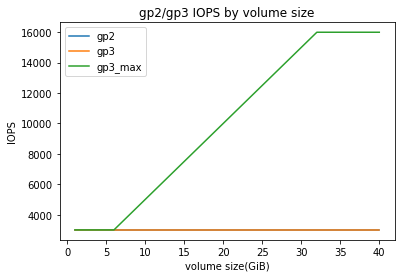

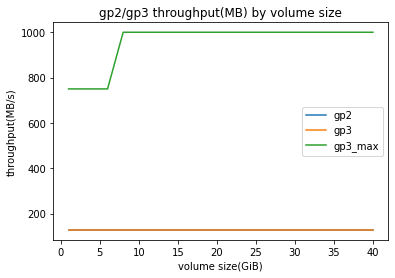

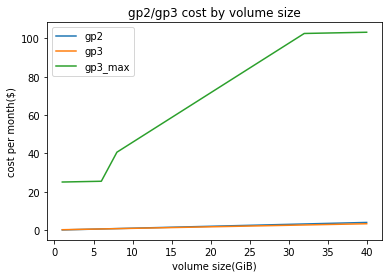

In [5]:
show(gp2_volumes[:40], gp3_volumes[:40], gp3_max_performance_volumes[:40])

In [6]:
print(f'gp2 type {gp2_volumes[0].volume_size} GB의 volume에서 최대 {gp2_volumes[0].throughput} MB/s throughput, 100 IOPS (burst {gp2_volumes[0].IOPS} IOPS) ${gp2_volumes[0].cost_per_month} per month')
gp3_1gb = gp3(1,1,1)
print(f'gp3 type {gp3_1gb.volume_size} GB의 volume에서 최소 {gp3_1gb.throughput} MB/s throughput, {gp3_1gb.IOPS} IOPS, ${gp3_1gb.cost_per_month} per month')

gp2 type 1 GB의 volume에서 최대 128 MB/s throughput, 100 IOPS (burst 3000 IOPS) $0.1 per month
gp3 type 1 GB의 volume에서 최소 125 MB/s throughput, 3000 IOPS, $0.08 per month


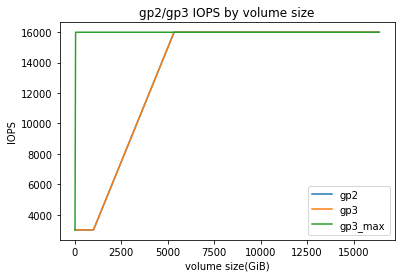

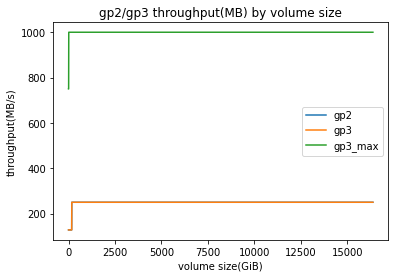

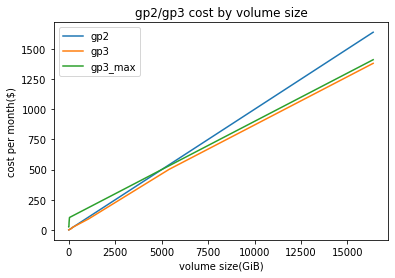

In [7]:
show(gp2_volumes, gp3_volumes, gp3_max_performance_volumes)

In [8]:
print(f'gp2 type {gp2_volumes[5333].volume_size} GB를 사용시 {gp2_volumes[5333].IOPS} IOPS, {gp2_volumes[5333].throughput} MB/s throughput, ${gp2_volumes[5333].cost_per_month}/month' )
print(f'gp3 type {gp3_max_performance_volumes[5333].volume_size} GB, {gp3_max_performance_volumes[5333].IOPS} IOPS, {gp3_max_performance_volumes[5333].throughput} MB/s throughput 사용 시 ${gp3_max_performance_volumes[5333].cost_per_month}/month')

gp2 type 5334 GB를 사용시 16000 IOPS, 250 MB/s throughput, $533.4/month
gp3 type 5334 GB, 16000 IOPS, 1000 MB/s throughput 사용 시 $526.72/month


In [9]:
print(f'gp2 type {gp2_volumes[gp2.max_size-1].volume_size} GB를 사용시 {gp2_volumes[gp2.max_size-1].IOPS} IOPS, {gp2_volumes[gp2.max_size-1].throughput} MB/s throughput, ${gp2_volumes[gp2.max_size-1].cost_per_month}/month' )
print(f'gp3 type {gp3_max_performance_volumes[gp3.max_size-1].volume_size} GB, {gp3_max_performance_volumes[gp3.max_size-1].IOPS} IOPS, {gp3_max_performance_volumes[gp3.max_size-1].throughput} MB/s throughput 사용 시 ${gp3_max_performance_volumes[gp3.max_size-1].cost_per_month}/month')

gp2 type 16384 GB를 사용시 16000 IOPS, 250 MB/s throughput, $1638.4/month
gp3 type 16384 GB, 16000 IOPS, 1000 MB/s throughput 사용 시 $1410.72/month


In [10]:

def show_cost_opt(gp2_volumes, gp3_volumes):
    plt.plot([volume.volume_size for volume in gp2_volumes], [volume.IOPS for volume in gp2_volumes], label='gp2')
    plt.plot([volume.volume_size for volume in gp3_volumes], [volume.IOPS for volume in gp3_volumes], label='gp3')
    plt.xlabel('volume size(GiB)') 
    plt.ylabel('IOPS') 
    plt.title('gp2/gp3 IOPS by volume size')
    plt.legend() 
    plt.show()

    plt.plot([volume.volume_size for volume in gp2_volumes], [volume.throughput for volume in gp2_volumes], label='gp2')
    plt.plot([volume.volume_size for volume in gp3_volumes], [volume.throughput for volume in gp3_volumes], label='gp3') 
    plt.xlabel('volume size(GiB)') 
    plt.ylabel('throughput(MB/s)') 
    plt.title('gp2/gp3 throughput(MB) by volume size')
    plt.legend() 
    plt.show()


    plt.plot([volume.volume_size for volume in gp2_volumes], [volume.cost_per_month for volume in gp2_volumes], label='gp2')
    plt.plot([volume.volume_size for volume in gp3_volumes], [volume.cost_per_month for volume in gp3_volumes], label='gp3')
    plt.xlabel('volume size(GiB)') 
    plt.ylabel('cost per month($)') 
    plt.title('gp2/gp3 cost by volume size')
    plt.legend() 
    plt.show()

In [11]:
gp3_max_performance_volumes = []
gp2_volumes = []
gp3_cost_volumes = []
for size in range(gp2.min_size, gp2.max_size+1):
    gp2_volume = gp2(size)
    gp2_volumes.append(gp2_volume)
    gp3_cost_volumes.append(gp3(volume_size=size, IOPS=size*3, throughput=size*0.25))

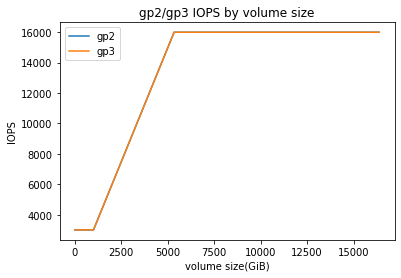

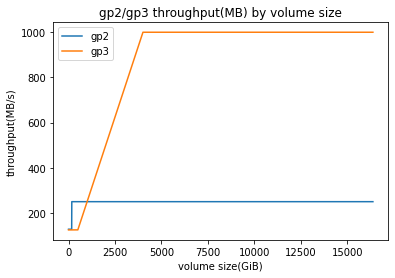

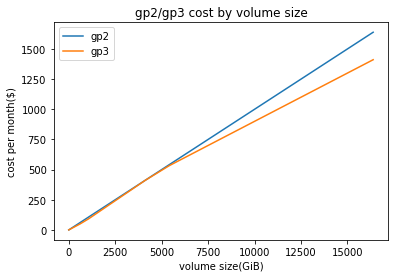

In [12]:
show_cost_opt(gp2_volumes, gp3_cost_volumes)